In [55]:
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import skimage
from skimage.io import imread
from skimage.transform import resize


images_dir = Path('/content/drive/MyDrive/kaggle/rice/ricedisease')
folders = [directory for directory in images_dir.iterdir() if directory.is_dir()]
categories = [fo.name for fo in folders]

images = []
flat_data = []
target = []
target_names=categories

for i, direc in enumerate(folders):
  for file in direc.iterdir():
    image = skimage.io.imread(file)
    image_resized=resize(image,(229,229))
    images.append(image_resized)
    flat_data.append(image_resized.flatten())
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)



In [56]:
folders

[PosixPath('/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy'),
 PosixPath('/content/drive/MyDrive/kaggle/rice/ricedisease/Bacterial leaf blight'),
 PosixPath('/content/drive/MyDrive/kaggle/rice/ricedisease/Brown spot'),
 PosixPath('/content/drive/MyDrive/kaggle/rice/ricedisease/Leaf smut')]

In [57]:
target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

In [58]:
images

array([[[[0.97254902, 0.96862745, 0.98823529],
         [0.97647059, 0.97254902, 0.99215686],
         [0.97254902, 0.96862745, 0.98823529],
         ...,
         [0.90588235, 0.90980392, 0.9372549 ],
         [0.90980392, 0.90980392, 0.9372549 ],
         [0.90967549, 0.90980392, 0.9372549 ]],

        [[0.97254902, 0.97254902, 0.99215686],
         [0.96862745, 0.96470588, 0.98823529],
         [0.96470588, 0.96078431, 0.98431373],
         ...,
         [0.90980392, 0.91334018, 0.9372549 ],
         [0.90980392, 0.91334018, 0.94079116],
         [0.91334018, 0.91371287, 0.94117647]],

        [[0.9731912 , 0.97254902, 0.99215686],
         [0.97254902, 0.96862745, 0.9886206 ],
         [0.96862745, 0.96470588, 0.98823529],
         ...,
         [0.90706155, 0.90980392, 0.9372549 ],
         [0.91764706, 0.91764706, 0.94509804],
         [0.91753966, 0.91372549, 0.94509804]],

        ...,

        [[0.90588235, 0.90980392, 0.92941176],
         [0.90588235, 0.90980392, 0.92941176]

In [59]:
target_names

['Healthy', 'Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [60]:
flat_data

array([[0.97254902, 0.96862745, 0.98823529, ..., 0.74117647, 0.74117647,
        0.76875589],
       [0.94509804, 0.97254902, 0.99009032, ..., 0.65098039, 0.64790095,
        0.70196078],
       [0.8745098 , 0.8745098 , 0.90196078, ..., 0.80392157, 0.80392157,
        0.83529412],
       ...,
       [0.9254902 , 0.88235294, 0.85882353, ..., 0.94117647, 0.90980392,
        0.89803922],
       [0.94117647, 0.91372549, 0.89411765, ..., 0.94901961, 0.92156863,
        0.91764706],
       [0.9254902 , 0.88235294, 0.85098039, ..., 0.94117647, 0.91372549,
        0.89983731]])

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3,random_state=109)

In [71]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [74]:
from sklearn import svm, metrics, datasets
from sklearn.model_selection import GridSearchCV
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)

In [75]:
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
y_pred = clf.predict(X_test)

In [77]:
print(clf.score(X_test,y_test))

0.8125


In [78]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.64      0.90      0.75        10
           2       0.86      0.50      0.63        12
           3       0.80      0.86  

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[12  0  0  0]
 [ 0  9  0  1]
 [ 0  4  6  2]
 [ 0  1  1 12]]


In [80]:
print(y_pred)

[3 0 3 0 2 0 0 1 2 1 1 3 3 3 0 1 3 2 1 1 3 0 0 0 3 0 2 2 0 2 3 3 0 3 3 3 0
 2 1 1 1 1 3 1 3 1 1 1]


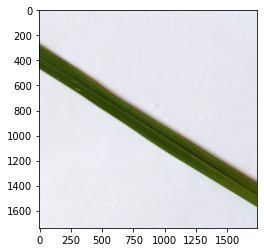

Predicted Disease is Healthy


In [95]:
import matplotlib.pyplot as plt
imagetest=skimage.io.imread('/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_172925.jpg')
flattenimg=[]
img_resized = resize(imagetest,(229,229), anti_aliasing=True, mode='reflect')
flattenimg.append(img_resized.flatten())
%matplotlib inline
plt.imshow(imagetest)
plt.show()
k = target_names
p = clf.predict(flattenimg)

s = [str(i) for i in p] 
a = int("".join(s)) 
print("Predicted Disease is", k[a])